#1. Import Data & Python Packages

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test (1).csv to test (1).csv
Saving train (1).csv to train (1).csv


In [ ]:
import io
import pandas as pd

train_df = pd.read_csv(io.BytesIO(uploaded['train (1).csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test (1).csv']))

In [ ]:
import numpy as np 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14) #plot에 표시되는 글씨 크기를 14로 설정
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True) 
#color_codes = True: Seaborn supports assigning colors to plots using matplotlib


import warnings
warnings.simplefilter(action='ignore')

In [ ]:
train_df.head()
#target variable is 'Survived' which is 0 for No and 1 for yes.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.shape

(891, 12)

In [ ]:
print('The number of samples into train data is {}.'.format(train_df.shape[0]))

The number of samples into train data is 891.


In [ ]:
test_df.head()
#test dataset does not contain the target variable 'Survived'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


#2. Data Quality & Missing Value Assessment

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##2.1 Age - Missing Values

In [ ]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0] * 100)))
#'%2.f' 후에 받는 변수를 소수점 둘째 자리까지 표현해줌. 뒤에 %하나가 아니라 2개를 붙여야 %가 출력됨.

Percent of missing "Age" records is 19.87%


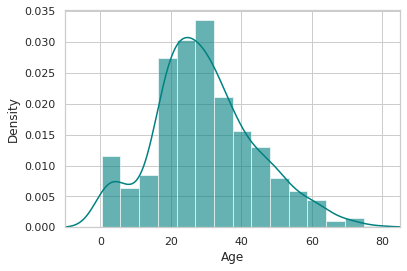

In [ ]:
ax = train_df['Age'].hist(bins = 15, density = True,  stacked = True,
                          color = 'teal', alpha= 0.6)
train_df['Age'].plot(kind = 'density', color = 'teal') #density plot 그려줌
ax.set(xlabel = 'Age') #x축에 Age 라벨링
plt.xlim(-10, 85) #축 범위 설정
plt.show() #코랩에서는 따로 실행하지 않아도 plot이 나오긴 함

Since 'Age' is skewed-right, using the mean to fill the null values will give us biased results(older than desired). Therefore, we're going to use median value to fill up the null values.

In [ ]:
print('The mean of "Age" is %2.f.' %(train_df['Age'].mean(skipna = True)))
print('The median of "Age" is %2.f.' %(train_df['Age'].median(skipna = True)))

The mean of "Age" is 30.
The median of "Age" is 28.


##2.2 Cabin - Missing Values

In [ ]:
print('Percent of missing "Cabin" records is %.2f%%.' 
      %((train_df['Cabin'].isnull().sum()/train_df.shape[0] * 100)))

Percent of missing "Cabin" records is 77.10%.


Since there are so many null values in 'Cabin', we are gonna drop the variable later.

##2.3 Embarked - Missing Values

In [ ]:
print('Percent of missing "Embarked" records is %.2f%%.' 
      %((train_df['Embarked'].isnull().sum()/train_df.shape[0] * 100)))

Percent of missing "Embarked" records is 0.22%.


In [ ]:
train_df.shape[0] * 0.0022

1.9602000000000002

Since there are only 2 missing values in 'Embarked', we are gonna fill up the null values using mode.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


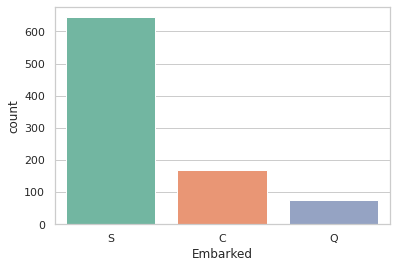

In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x = 'Embarked', data = train_df, palette = 'Set2')
plt.show()

In [ ]:
print('The most common boarding port of embarkation is %s.' 
      %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


Because the most common boarding port of embarkation was S(Southampton), we are gonna fill up the null value with S.

##2.4 Final Adjustment to Data(Train & Test)

In [ ]:
train_data = train_df.copy() #make a copy of train_df and assign it to train_data
train_data['Age'].fillna(train_df['Age'].median(skipna = True), inplace = True)
train_data.drop('Cabin', axis = 1, inplace = True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


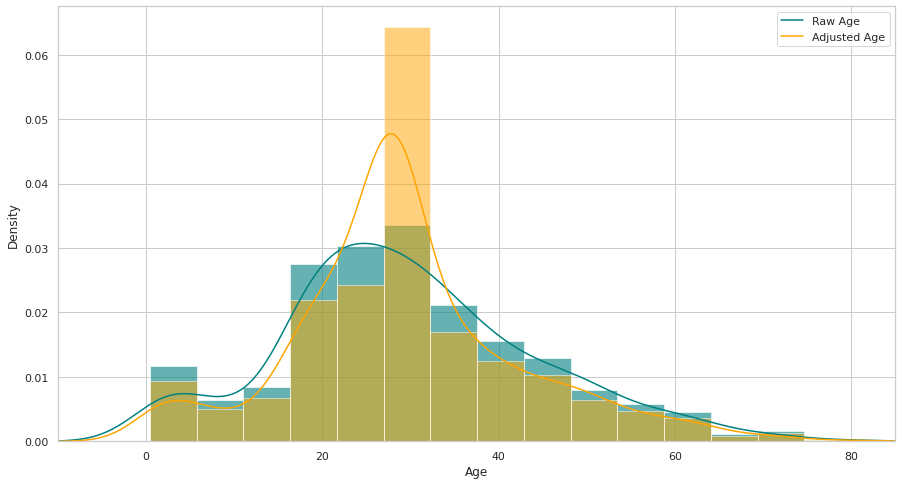

In [ ]:
plt.figure(figsize = (15, 8))
ax = train_df['Age'].hist(bins = 15, density = True, stacked = True, 
                          color = 'teal', alpha = 0.6)
train_df['Age'].plot(kind = 'density', color = 'teal')
ax = train_data['Age'].hist(bins = 15, density = True, stacked = True,
                            color = 'orange', alpha = 0.5)
train_data['Age'].plot(kind = 'density', color = 'orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel = 'Age')
plt.xlim(-10, 85)
plt.show()
#결측치를 중위수로 채웠다보니 중위수의 빈도가 굉장히 높은 것을 히스토그램에서 확인할 수 있음

###2.4.1 Additional Variables  

SibSp = # of siblings/spouses aboard the Titanic

Parch = # of parents/children aboard the Titanic

Since both sibsp and parch are related to traveling with family, I'll combine the effect of these variables into one categorical predictor.

In [ ]:
train_data['TravelAlone'] = np.where(
    (train_data['SibSp'] + train_data['Parch']) >0, 0, 1)
#혼자 여행했으면 1, 혼자 여행한 것이 아니라면 0
train_data.drop('SibSp', axis = 1, inplace = True)
train_data.drop('Parch', axis = 1, inplace = True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [ ]:
training = pd.get_dummies(train_data, columns = ['Pclass', 'Embarked', 'Sex'])
training.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


I'm going to drop variables 'Name', 'Ticket', 'PassengerId' and 'Sex_female'. 'Sex_female' is dropped because we can know the sex of the passenger with only using 'Sex_male'. (Therefore it is okay to drop 'Sex_male' and keep 'Sex_female')

In [ ]:
training.drop('Name', axis = 1, inplace = True)
training.drop('Ticket', axis = 1, inplace = True)
training.drop('PassengerId', axis = 1, inplace = True)
training.drop('Sex_female', axis = 1, inplace = True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

I am going to apply the same change to test dataset. Replace the null values of Age with 28, and drop Cabin. And for the one null value for Fare, since the passenger was in 3rd Pclass, I'm going to use the mean value of 'Fare' for those of whose 'Pclass' equalled 3 rather than median which is used in the notebook.

And make dummy varaibles as I did right above.

In [ ]:
test_df[test_df['Pclass'] == 3]['Fare'].mean(skipna = True)

12.459677880184334

In [ ]:
test_data = test_df.copy()
test_data['Age'].fillna(train_df['Age'].median(skipna = True), inplace = True)
test_data['Fare'].fillna(test_df[test_df['Pclass'] == 3]['Fare'].mean(skipna = True), inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

test_data['TravelAlone'] = np.where(test_data['SibSp'] + test_data['Parch'] > 0, 0, 1)
test_data.drop('SibSp', axis = 1, inplace = True)
test_data.drop('Parch', axis = 1, inplace = True)

testing = pd.get_dummies(test_data, columns = ['Pclass', 'Embarked', 'Sex'])
testing.drop('Name', axis = 1, inplace = True)
testing.drop('Ticket', axis = 1, inplace = True)
testing.drop('PassengerId', axis = 1, inplace = True)
testing.drop('Sex_female', axis = 1, inplace = True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


#3. EDA

##3.1 Exploration of Age

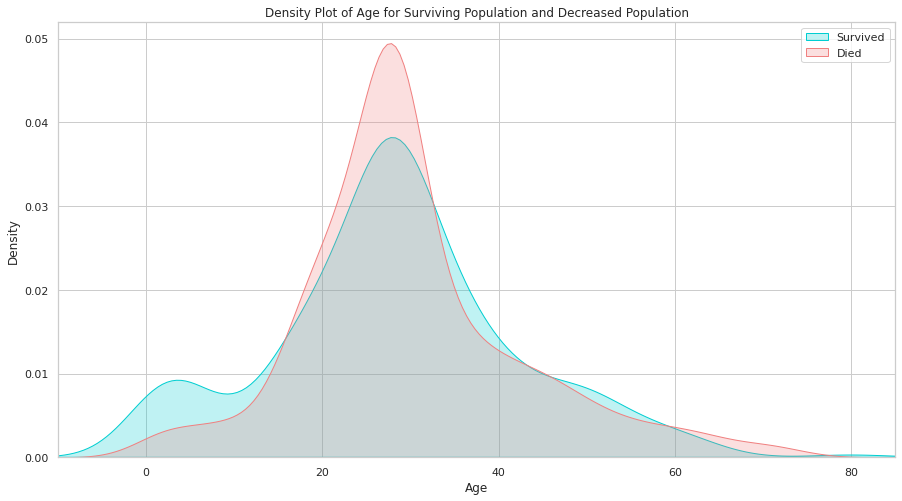

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1], 
                 color = 'darkturquoise', shade = True)
#draw a kernel density plot
#shade = alias for fill. using fill is recommended
##if true, fill in the area under univariate density curves or between bivariate contours
sns.kdeplot(final_train['Age'][final_train.Survived == 0],
            color = 'lightcoral', shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Decreased Population')
ax.set(xlabel = 'Age')
plt.xlim(-10, 85)
plt.show()

The age distribution for survivors and the dead is pretty similar. One notable difference is that a larger proportion of the survivor were children. We can see that the passengers evidently made an attempt to save children by giving them a place on the life rafts.

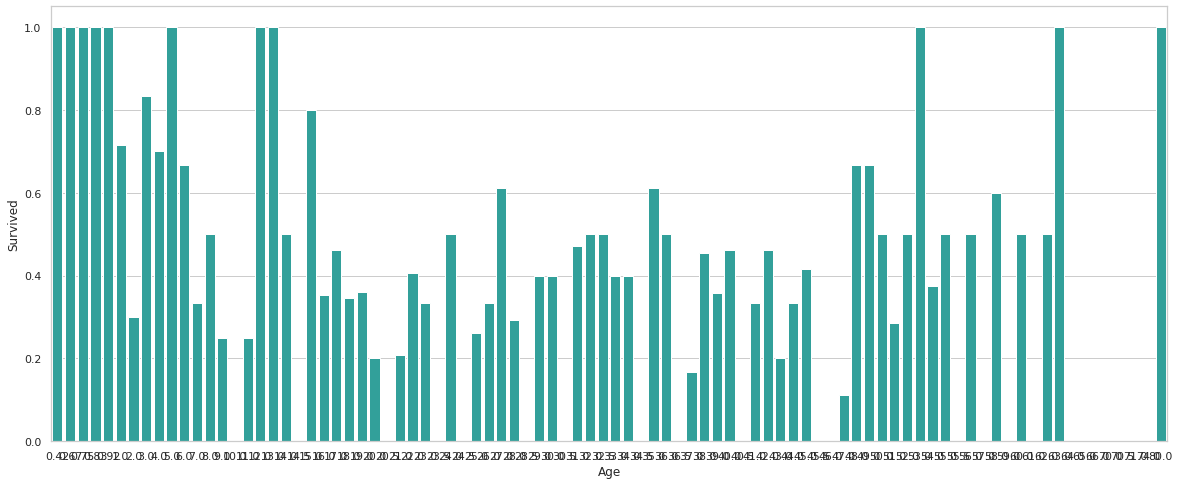

In [ ]:
plt.figure(figsize = (20, 8))
avg_survival_byage = final_train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()
#as_index를 True로 하면 groupby에 사용된 변수가 index로 들어감
sns.barplot(x = 'Age', y = 'Survived', data = avg_survival_byage, 
                color = 'LightSeaGreen')
plt.show()

Considering the survival rate of passengers under 16, I'll also include other categorical varaible in my dataset: 'Minor'

In [ ]:
final_train['IsMinor'] = np.where(final_train['Age'] <= 16, 1, 0)
#16세 이하면 1, 16세가 넘으면 0
final_test['IsMinor'] = np.where(final_test['Age'] <= 16, 1, 0)

##3.2 Exploration of Fare

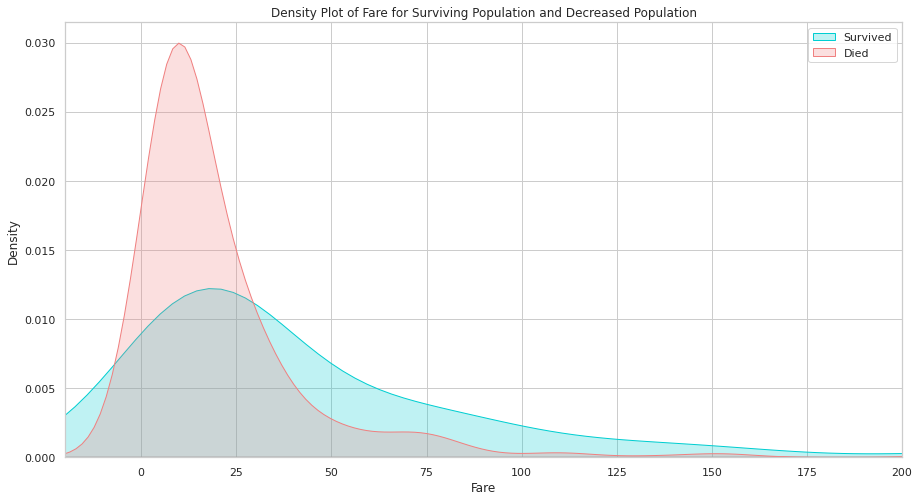

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived == 1], 
                 color = 'darkturquoise', shade = True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0],
            color = 'lightcoral', shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Decreased Population')
ax.set(xlabel = 'Fare')
plt.xlim(-20, 200)
plt.show()

As the distributions are clearly different, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class.

##3.3 Exploration of Passenger Class

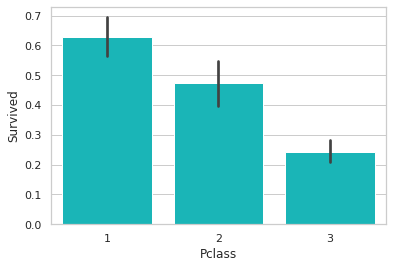

In [ ]:
sns.barplot('Pclass', 'Survived', data = train_df, color = 'darkturquoise')
plt.show()

Higher class had higher survival rate.

##3.4 Exploration of Embarked Port

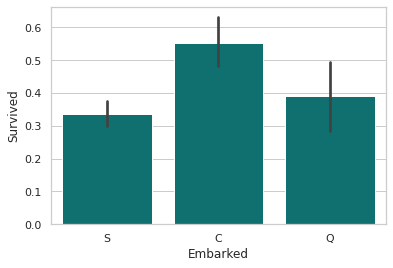

In [ ]:
sns.barplot('Embarked', 'Survived', data = train_df, color = 'teal')
plt.show()

Passengers who boarded in Cherbourg had highest survival rate. Next was those whose boarded in Queenstown followed by Southampton by a little difference. This may be related to passenger class.

It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

##3.5 Exploration of Traveling Alone vs With Family

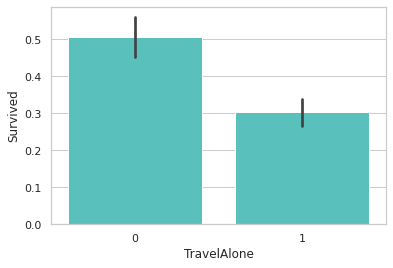

In [ ]:
sns.barplot('TravelAlone', 'Survived', data = final_train, color = 'mediumturquoise')
plt.show()

Those who traveled with family had higher survival rate. Given the era, it's likely that individuals traveling alone were mostly male.

##3.6 Exploration of Gender Varaible

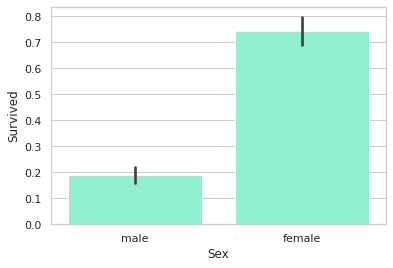

In [ ]:
sns.barplot('Sex', 'Survived', data = train_df, color = 'aquamarine')
plt.show()

It is very obvious that female had much higher survival rate.

#4. Logistic Regression and Results

##4.1 Feature selection

###4.1.1 Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFE(Recursive Feature Elimination)는 어떤 관점에서 바라보면 feature selection의 가장 단순한 방법이다. 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 이를 반복한다. 즉, 학습하고 싶은 모델을 정하고, 이 모델로 모든 feature를 활용하여 데이터를 학습했을 때(full model)의 각 feature의 feature importance를 도출한다. 그리고 feature importance가 낮은 feature부터 하나씩 제거해가면서 원하는 feature 개수가 될 때까지 이를 반복하는 것이다. 이렇게 원하는 feature 개수에 해당하는 상위 feature importance를 가지는 feature들이 최종 feature selection 결과가 된다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 
        'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
#Embarked_C와 Embarked_S가 0이면 Embarked_Q이므로 Embarked_Q를 제외한 나머지 2개만 
#사용한 것으로 보임(Pclass_3을 제외한 것도 마찬가지 이유)

X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression()

rfe = RFE(model, n_features_to_select = 8)
rfe = rfe.fit(X, y)
#패키지가 업데이트되었는지 노트북에 있는 것처럼 단순히 8이라고 하면 에러뜸
#n_features_to_select = 8이라고 specify해주어야함

print('Selected features: %s' % list(X.columns[rfe.support_]))
#rfe.support_: rfe method에 따라 선정된 feature면 true, 아니면 false 값을 가짐

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


###4.1.2. Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

RFE를 사용할 때에 가장 큰 단점은 몇 개의 feature를 남겨야 할 지를 사용자가 직접 정의해야 한다는 점이다.
이러한 단점을 극복하기 위해 등장한 것이 RFECV이다. RFECV(Recursive Feature Elimination 
with Cross Validation)는 위의 RFE가 사용하던 방법과 똑같이 가장 feature importance가 낮은 feature들을 제거해가면서 각 feature 개수마다 모델의 성능을 계산한다. 이 때, 각 feature 개수마다 K-fold validation 등의 cross validation을 활용하여 각기 다른 성능을 도출한다. 

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = LogisticRegression(), step = 1, cv = 10, 
              scoring = 'accuracy')
#step :int or float, default=1
#If greater than or equal to 1, then step corresponds to the 
#(integer) number of features to remove at each iteration. 
#If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of 
#features to remove at each iteration. Note that the last iteration may remove 
#fewer than step features in order to reach min_features_to_select.
rfecv.fit(X ,y)

print('Optimal number of features %d' %rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))
#rfecv.n_features_: rfecv method를 통해 선정된 feature의 수
#rfecv.support_: rfecv method에 따라 선정된 feature면 true, 아니면 false 값을 가짐

Optimal number of features 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


rfecv의 결과 X의 모든 feature들이 선정됨

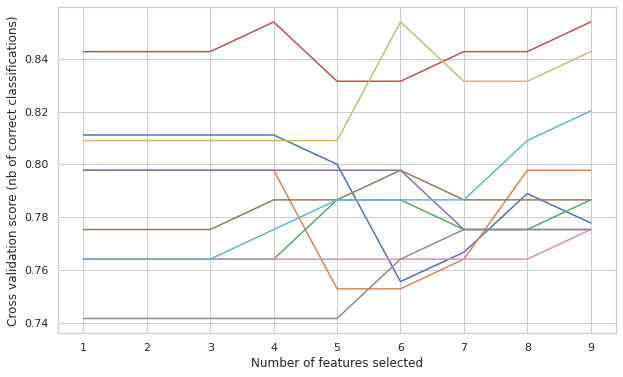

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#이 셀과 이 위의 셀은 rfecv의 패키지의 변화 때문인지 뭔지 이유는 몰라도 결과값은 노트북과 다르게 나옴
#따라서 노트북에선 rfecv를 통해 제외된 'Fare'를 사용하지 않지만, 사용해보도록 하겠음

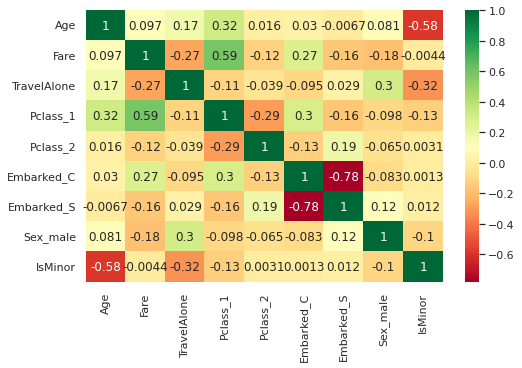

In [ ]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize = (8, 5))
sns.heatmap(X.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

##4.2. Review of model evaluation procedures
Motivation: Need a way to choose between machine learning models

Goal is to estimate likely performance of a model on out-of-sample data
Initial idea: Train and test on the same data

But, maximizing training accuracy rewards overly complex models which overfit the training data
Alternative idea: Train/test split

Split the dataset into two pieces, so that the model can be trained and tested on different data
Testing accuracy is a better estimate than training accuracy of out-of-sample performance
Problem with train/test split
It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
Testing accuracy can change a lot depending on a which observation happen to be in the testing set


###4.2.1. Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.434
LogisticRegression auc is 0.874


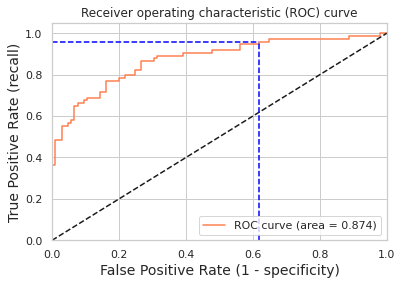

Using a threshold of 0.097 guarantees a sensitivity of 0.959 and a specificity of 0.381, i.e. a false positive rate of 61.90%.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
#fpr = false positive rate
#tpr = true positive rate
#thr = threshold
#ROC 커브는 이진 분류기의 성능을 표현하는 커브이고, 가능한 모든 threshold에 대해 
#FPR과 TPR의 비율을 표현한 것이다. 최종적으로는 ROC 커브가 좌상단에 붙어있는 것이 더 좋은 
#이진분류기를 뜻한다.
#두 클래스를 더 잘 구별할 수 있다면 ROC 커브는 좌상단에 더 가까워지게 된다.

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
#__class__.__name__: 클래스의 이름을 불러옴

idx = np.min(np.where(tpr > 0.95)) 
# index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
#auc값이 0.874 임은, 해당 분류모델이 양성 클래스와 음성 클래스를 구별할 수 있는 확률이 87.4%임을 의미함
plt.plot([0, 1], [0, 1], 'k--') # 검은 대각선(x축 시작과 끝, y축 시작과 끝 지정해줌)
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue') #파란 수평선
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue') #파란 수직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = "lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
#Sensitivity는 recall과 같음: 실제 positive중 positive라고 분류한 비율
#Specificity: TN/(FP + TN): 실제 negative 중 negative라고 분류한 비율
#False Positive Rate: 실제 negative중 positive라고 분류한 비율(올바르게 분류하지 못한 비율)
##1-Specificity = False Positive Rate


###4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.799
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.849


###4.2.3. Model evaluation based on K-fold cross-validation using cross_validate() function

In [ ]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


##4.3. GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=1.80001)
best params: {'C': 1.80001}
best score: 0.8002496878901374


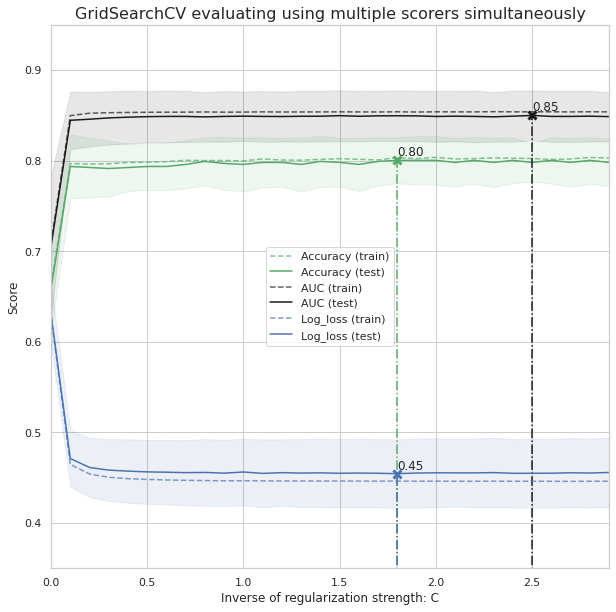

In [ ]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
#C is inverse of regularization, the larger the C, the smaller is regularization, 
#means that your algo is more prone to overfit the data.
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): #zip함수 각 개체가 담고 있는 원소를 서로 엮어줌
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    #np.nonzero: 요소들 중 0이 아닌 값들의 index 반환
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    
     # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

##4.4. GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

We can apply many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or not with respect to many scorers and tunning on parameter for a given estimator!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=3.9000100000000004))])
best params: {'clf__C': 3.9000100000000004}
best score: 0.7977653631284916


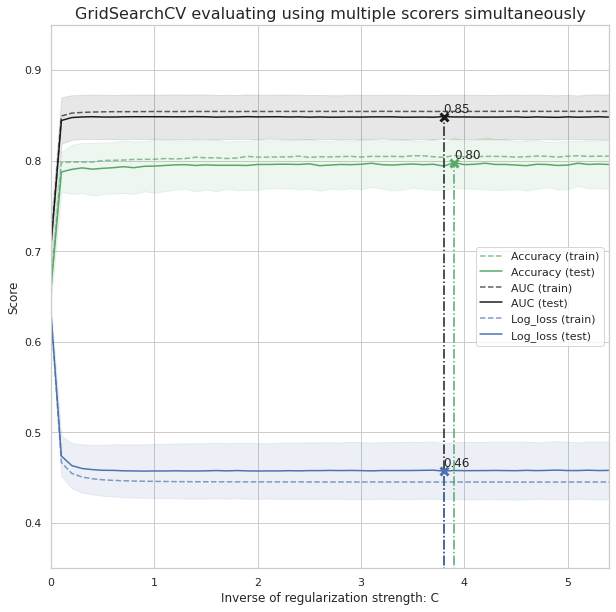

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()
# with_mean: bool, default=True
# If True, center the data before scaling. 
# This does not work (and will raise an exception) when attempted on sparse matrices, 
# because centering them entails building a dense matrix 
# which in common use cases is likely to be too large to fit in memory.

# with_std: bool, default=True
# If True, scale the data to unit variance (or equivalently, unit standard deviation).

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state = 42)

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth =3, ms = 8)
    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
#log_clf: 표준화, gridsearchCV를 거친 로지스틱 회귀모형
final_test['PassengerId'] = test_df['PassengerId']
final_test['Name'] = test_df['Name']

submission = final_test[['Name', 'PassengerId', 'Survived']]
#본래 submission에는 PassengerId와 Survived만 포함해야하지만 Name도 넣어봤음

submission.to_csv('submission.csv', index = False)
#csv파일로 내보내줌. index = True이면 row names에 index 적어줌

submission.tail()

,Name,PassengerId,Survived
413,"Spector, Mr. Woolf",1305,0
414,"Oliva y Ocana, Dona. Fermina",1306,1
415,"Saether, Mr. Simon Sivertsen",1307,0
416,"Ware, Mr. Frederick",1308,0
417,"Peter, Master. Michael J",1309,0
